# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [96]:
import numpy as np
import pandas as pd
stat_table=pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',
header=None,
              na_values='?'
             )
stat_table.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [97]:
columns=['surgery?', 'Age','rectal temperature', 'pulse', 'respiratory rate', 
         'temperature of extremitie', 'pain', 'outcome']

In [98]:
stat_table=stat_table[[0,1,3,4,5,6,10,22]]
stat_table.columns = columns
stat_table.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremitie,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [99]:
# Задание 1. Базовое изучение
stat_table.describe()


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremitie,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [101]:
# мода
stat_table.mode()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremitie,pain,outcome
0,1.0,1,38.0,48.0,20.0,3.0,3.0,1.0


In [102]:
# считаем квартиль Q1
Q1=stat_table.quantile(0.25)
Q1

surgery?                      1.0
Age                           1.0
rectal temperature           37.8
pulse                        48.0
respiratory rate             18.5
temperature of extremitie     1.0
pain                          2.0
outcome                       1.0
Name: 0.25, dtype: float64

In [103]:
# считаем квартиль Q3
Q3=stat_table.quantile(0.75)
Q3

surgery?                      2.0
Age                           1.0
rectal temperature           38.5
pulse                        88.0
respiratory rate             36.0
temperature of extremitie     3.0
pain                          4.0
outcome                       2.0
Name: 0.75, dtype: float64

In [104]:
# Считаем Размах
IOR=Q3-Q1
IOR

surgery?                      1.0
Age                           0.0
rectal temperature            0.7
pulse                        40.0
respiratory rate             17.5
temperature of extremitie     2.0
pain                          2.0
outcome                       1.0
dtype: float64

<AxesSubplot:>

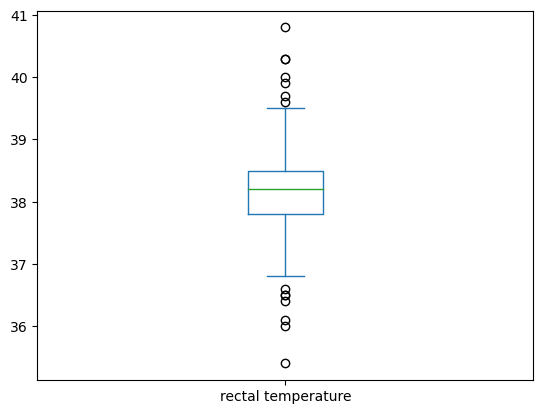

In [115]:
stat_table.drop(['surgery?','Age','pulse','respiratory rate','temperature of extremitie','pain','outcome'],axis=1).plot(kind='box')

<AxesSubplot:>

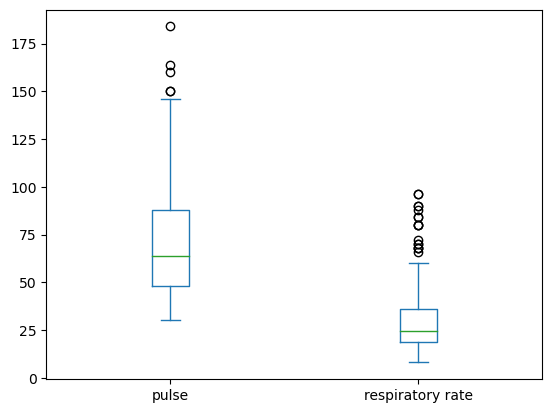

In [116]:
stat_table.drop(['surgery?','Age','rectal temperature','temperature of extremitie','pain','outcome'],axis=1).plot(kind='box')

In [105]:
# Задание 2. Работа с выбросами
# Считаем нижний выброс
outlier_lower_boundary=Q1-1.5*IOR
outlier_lower_boundary=outlier_lower_boundary[[2,3,4]]
outlier_lower_boundary

rectal temperature    36.75
pulse                -12.00
respiratory rate      -7.75
dtype: float64

In [106]:
# Считаем Верхний выброс
outlier_upper_boundary=Q3+1.5*IOR
outlier_upper_boundary=outlier_upper_boundary[[2,3,4]]
outlier_upper_boundary

rectal temperature     39.55
pulse                 148.00
respiratory rate       62.25
dtype: float64

In [107]:
# Задание 3. Работа с пропусками
stat_table.isna().sum(axis=0)

surgery?                      1
Age                           0
rectal temperature           60
pulse                        24
respiratory rate             58
temperature of extremitie    56
pain                         55
outcome                       1
dtype: int64

In [132]:
stat_table.dropna(subset= ['surgery?', 'outcome'], inplace=True)
stat_table.isna().sum(axis=0)
stat_table.pain=stat_table.pain.fillna(stat_table.pain.mode().squeeze())
stat_table.pulse=stat_table.pulse.fillna(stat_table.pulse.median())

rect_temperature_medians=stat_table.groupby('surgery?')['rectal temperature'].median()

resp_rate_medians=stat_table.groupby('surgery?')['respiratory rate'].median()
for s, rate_med in resp_rate_medians.items():
    stat_table.loc[stat_table['surgery?']==s, 'respiratory rate']=rate_med

rect_temperature_medians=stat_table.groupby('surgery?')['rectal temperature'].median()
for s, rect_med in resp_rate_medians.items():
    stat_table.loc[stat_table['surgery?']==s, 'rectal temperature']=rect_med

Extreme_temperature= stat_table.groupby('surgery?')['temperature of extremitie'].median()
for s, extr_med in Extreme_temperature.items():
    stat_table.loc[stat_table['surgery?']==s, 'temperature of extremitie']=extr_med

stat_table.isna().sum(axis=0)

surgery?                     0
Age                          0
rectal temperature           0
pulse                        0
respiratory rate             0
temperature of extremitie    0
pain                         0
outcome                      0
dtype: int64